<a href="https://colab.research.google.com/github/ai-veritas/ml-labs/blob/main/ML_P_1_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer

In [8]:
df = load_breast_cancer()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
X = pd.DataFrame(df.data,columns = df.feature_names)
y = pd.Series(df.target)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Pre-processing

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
X_train.shape

(398, 30)

In [73]:
X_train = pd.DataFrame(X_train,columns = df.feature_names)
X_test = pd.DataFrame(X_test,columns = df.feature_names)

In [74]:
def feature_extraction(X):
  features_list = {
      'Feature': [],
      'Mean': [],
      'Std': [],
      'Range': [],
      'Skew': [],
      'Kurt': []
  }

  for i in X.columns:
    features_list['Feature'].append(i)
    features_list['Mean'].append(X[i].mean())
    features_list['Std'].append(X[i].std())
    features_list['Range'].append(X[i].max() - X[i].min())
    features_list['Skew'].append(X[i].skew())
    features_list['Kurt'].append(X[i].kurt())
  stats_df = pd.DataFrame(features_list)

  return stats_df.T

In [75]:
feature_extraction(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Feature,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Mean,-0.032938,-0.027054,-0.033015,-0.044118,-0.028794,-0.008593,-0.034284,-0.034175,-0.014505,-0.003661,-0.060562,-0.058316,-0.054396,-0.06316,-0.011399,-0.016024,-0.025819,-0.008835,-0.042011,-0.025382,-0.020445,-0.010693,-0.019277,-0.027708,0.017344,0.014833,0.010257,0.001508,0.023629,0.023502
Std,0.931125,0.971075,0.92887,0.889033,0.982204,0.993448,0.927257,0.933808,0.962492,0.99687,0.852588,0.880645,0.851414,0.741623,0.987897,0.977764,0.880397,0.940135,0.916154,0.879214,0.959875,0.994655,0.958144,0.936329,1.016703,1.02697,1.019485,0.98507,1.01442,1.050241
Range,5.180135,5.608232,5.2604,4.933096,7.882996,5.399276,4.411817,4.75899,5.753887,6.730784,4.542191,5.820052,5.105251,4.771555,9.488051,7.399104,10.073104,6.634375,6.26557,7.916044,5.085947,6.109899,4.872665,5.707591,6.071709,6.455101,6.006499,4.420281,8.207001,8.448696
Skew,0.701618,0.511503,0.744038,1.205708,0.513557,1.159069,1.166012,1.023626,0.559981,1.452265,1.778656,0.97972,2.010984,2.304196,2.529923,1.949138,3.799634,1.24287,1.816964,2.672309,1.023948,0.483322,1.026693,1.676066,0.478867,1.538889,1.223729,0.490345,1.528806,1.844059
Kurt,0.151726,0.360616,0.215801,1.233172,1.338924,1.270753,0.862089,0.474323,0.617633,3.808127,3.220705,1.577651,4.582334,5.969659,12.989284,5.739402,29.686204,3.399443,4.999457,11.970062,0.659176,0.478865,0.686152,3.090132,0.444906,3.146168,1.90779,-0.589141,5.050009,5.881006


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

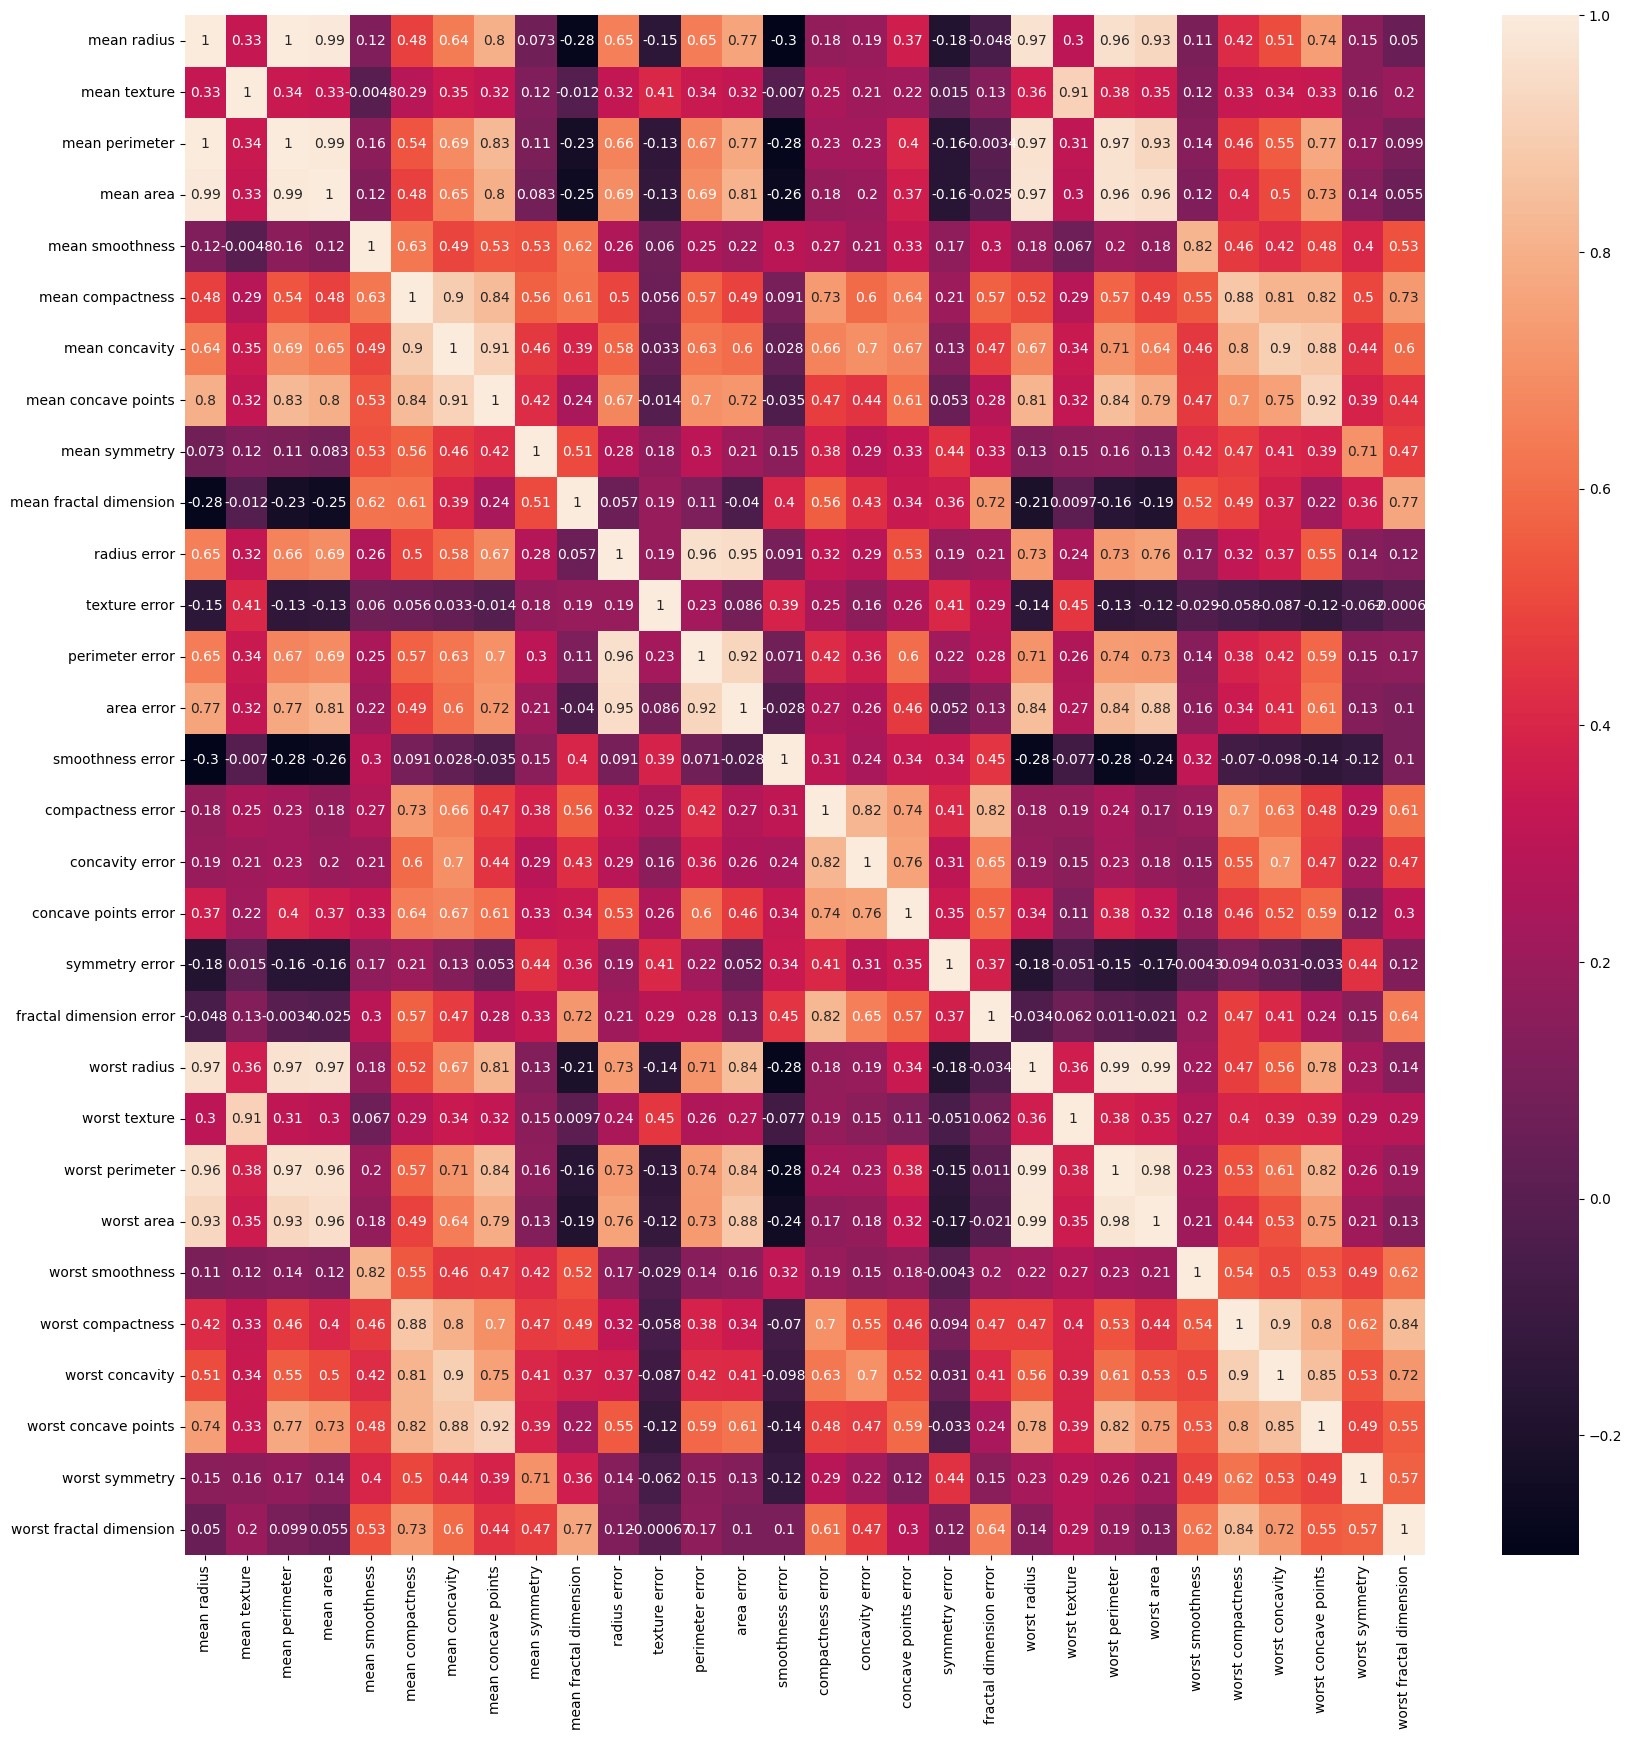

In [79]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)